Solve question 3.11 (use https://www.stata.com/data/s4poe4/cps4_small.dta) in HGL. Sketch all distributions, fitted lines, and graphs using Stata.


How much does experience affect wage rates? The data file cps4_small.dat contains 1000 observations on hourly wage rates, experience and other variables from the 2008 Current Population Survey (CPS).
- Estimate the linear regression $WAGE = \beta_1 + \beta_2 EXPER + e $ and discuss the results. Using your software plot a scatter diagram with WAGE on the vertical axis and EXPER on the horizontal axis. Sketch in by hand, or using your software, the fitted regression line.

In [1]:
clear all

use cps4_small.dta

regress wage exper





      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =      7.98
       Model |  1306.16677         1  1306.16677   Prob > F        =    0.0048
    Residual |  163259.261       998  163.586434   R-squared       =    0.0079
-------------+----------------------------------   Adj R-squared   =    0.0069
       Total |  164565.428       999  164.730158   Root MSE        =     12.79

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0889534   .0314802     2.83   0.005     .0271785    .1507283
       _cons |   18.25768   .9273279    19.69   0.000     16.43795    20.07742
------------------------------------------------------------------------------


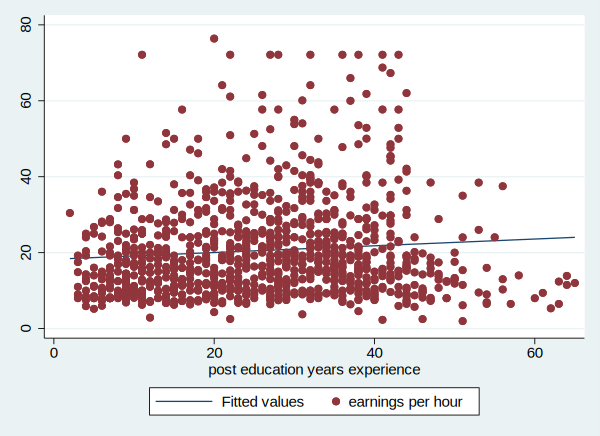

In [2]:
graph twoway (lfit wage exper)(scatter wage exper)

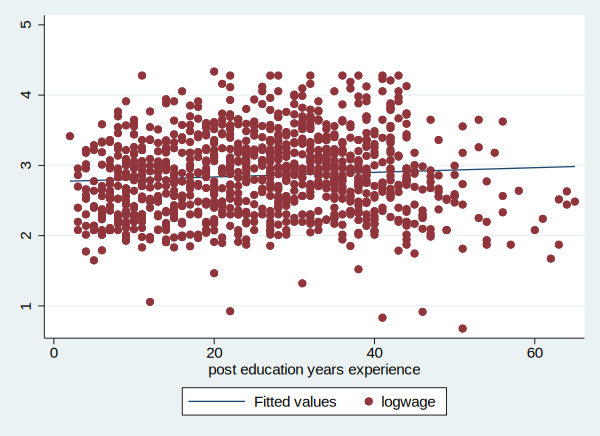

In [3]:
gen logwage=log(wage)
graph twoway (lfit logwage exper)(scatter logwage exper)

Test the statistical significance of the estimated slope of the relationship at the 5% level. Use a one-tail test.


In [4]:
test _b[exper]=0


 ( 1)  exper = 0

       F(  1,   998) =    7.98
            Prob > F =    0.0048


* right tail test mu = 16.5

* details
use https://www.stata.com/data/s4poe4/hip.dta, clear
quietly summarize y, detail
scalar ybar = r(mean)
scalar nobs = r(N)
scalar df = nobs - 1
scalar sighat = r(sd)
scalar se = sighat/sqrt(nobs)
scalar t1 = (ybar - 16.5)/se
scalar tc95 = invttail(df,.05)
scalar p1 = ttail(df,t1)

di "right tail test"
di "tstat = " t1
di "tc95  = " tc95
di "pval  = " p1



Repeat part (a) for the sub-samples consisting of (i) females, (ii) males, (iii) blacks, and (iv) white males. What differences, if any, do you notice?

In [5]:
summarize female black


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      female |      1,000        .514    .5000541          0          1
       black |      1,000        .112    .3155243          0          1




      Source |       SS           df       MS      Number of obs   =       514
-------------+----------------------------------   F(1, 512)       =      1.36
       Model |  220.991952         1  220.991952   Prob > F        =    0.2446
    Residual |  83374.2114       512  162.840257   R-squared       =    0.0026
-------------+----------------------------------   Adj R-squared   =    0.0007
       Total |  83595.2034       513  162.953613   Root MSE        =    12.761

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0497149   .0426756     1.16   0.245    -.0341259    .1335557
       _cons |   17.84125   1.273498    14.01   0.000     15.33932    20.34317
------------------------------------------------------------------------------


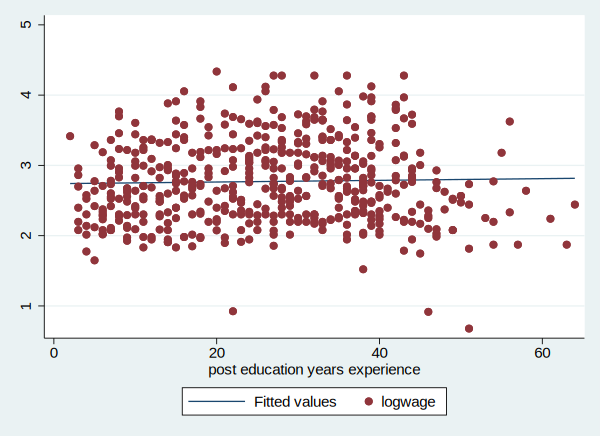

In [6]:
* females
regress wage exper if female==1
graph twoway (lfit logwage exper if female == 1)(scatter logwage exper if female == 1)



      Source |       SS           df       MS      Number of obs   =       486
-------------+----------------------------------   F(1, 484)       =      9.37
       Model |   1496.6842         1   1496.6842   Prob > F        =    0.0023
    Residual |   77269.442       484  159.647607   R-squared       =    0.0190
-------------+----------------------------------   Adj R-squared   =    0.0170
       Total |  78766.1262       485  162.404384   Root MSE        =    12.635

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .1407156   .0459577     3.06   0.002     .0504143    .2310169
       _cons |   18.45112    1.33489    13.82   0.000     15.82823    21.07402
------------------------------------------------------------------------------


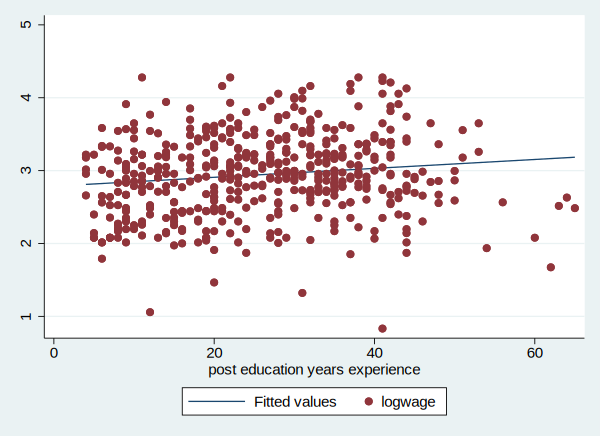

In [7]:
* males
regress wage exper if female==0
graph twoway (lfit logwage exper if female == 0)(scatter logwage exper if female == 0)



      Source |       SS           df       MS      Number of obs   =       112
-------------+----------------------------------   F(1, 110)       =      0.78
       Model |  119.699598         1  119.699598   Prob > F        =    0.3777
    Residual |  16781.0251       110  152.554773   R-squared       =    0.0071
-------------+----------------------------------   Adj R-squared   =   -0.0019
       Total |  16900.7247       111  152.258781   Root MSE        =    12.351

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |    .073835   .0833544     0.89   0.378    -.0913539    .2390238
       _cons |   15.78931   2.531881     6.24   0.000     10.77171     20.8069
------------------------------------------------------------------------------


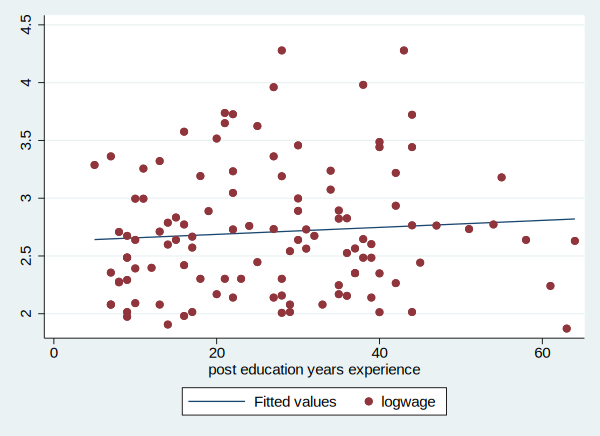

In [8]:
* blacks
regress wage exper if black == 1
graph twoway (lfit logwage exper if black == 1)(scatter logwage exper if black == 1)



      Source |       SS           df       MS      Number of obs   =       440
-------------+----------------------------------   F(1, 438)       =      7.77
       Model |  1267.27869         1  1267.27869   Prob > F        =    0.0055
    Residual |  71395.1494       438  163.002624   R-squared       =    0.0174
-------------+----------------------------------   Adj R-squared   =    0.0152
       Total |   72662.428       439  165.518059   Root MSE        =    12.767

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .1358448   .0487197     2.79   0.006     .0400914    .2315982
       _cons |   19.09817   1.416441    13.48   0.000     16.31431    21.88204
------------------------------------------------------------------------------


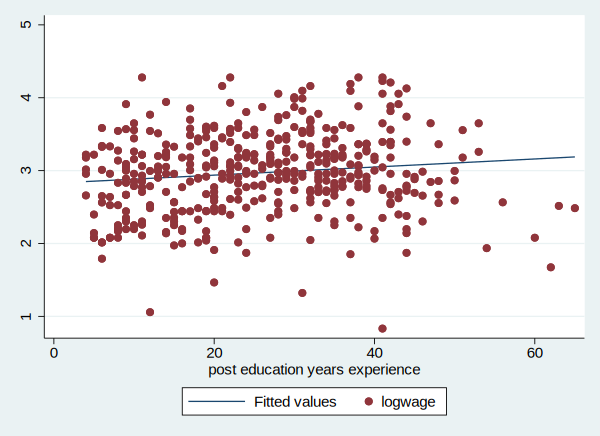

In [9]:
* white males
regress wage exper if female==0 & black == 0
graph twoway (lfit logwage exper if black == 0 & female == 0)(scatter logwage exper if black == 0 & female == 0)

For each of the estimated regression models in (a) and (c), calculate the least squares residuals and plot them against EXPER. Are any patterns evident?



      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =      7.98
       Model |  1306.16677         1  1306.16677   Prob > F        =    0.0048
    Residual |  163259.261       998  163.586434   R-squared       =    0.0079
-------------+----------------------------------   Adj R-squared   =    0.0069
       Total |  164565.428       999  164.730158   Root MSE        =     12.79

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0889534   .0314802     2.83   0.005     .0271785    .1507283
       _cons |   18.25768   .9273279    19.69   0.000     16.43795    20.07742
------------------------------------------------------------------------------


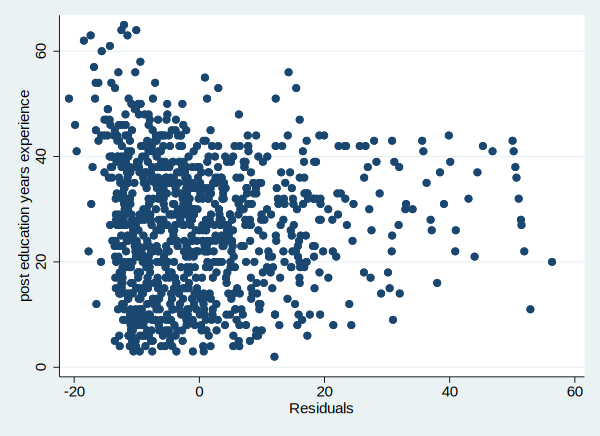

In [10]:
* base
regress wage exper
predict e_base, residuals

scatter exper e_base



      Source |       SS           df       MS      Number of obs   =       514
-------------+----------------------------------   F(1, 512)       =      1.36
       Model |  220.991952         1  220.991952   Prob > F        =    0.2446
    Residual |  83374.2114       512  162.840257   R-squared       =    0.0026
-------------+----------------------------------   Adj R-squared   =    0.0007
       Total |  83595.2034       513  162.953613   Root MSE        =    12.761

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0497149   .0426756     1.16   0.245    -.0341259    .1335557
       _cons |   17.84125   1.273498    14.01   0.000     15.33932    20.34317
------------------------------------------------------------------------------


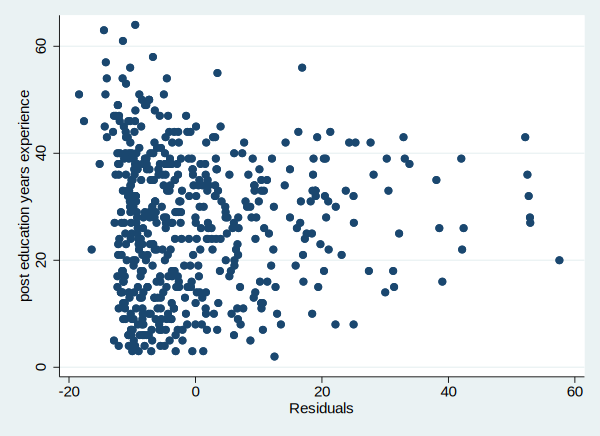

In [11]:
* females
regress wage exper if female==1
predict e_female, residuals
scatter exper e_female if female == 1



      Source |       SS           df       MS      Number of obs   =       486
-------------+----------------------------------   F(1, 484)       =      9.37
       Model |   1496.6842         1   1496.6842   Prob > F        =    0.0023
    Residual |   77269.442       484  159.647607   R-squared       =    0.0190
-------------+----------------------------------   Adj R-squared   =    0.0170
       Total |  78766.1262       485  162.404384   Root MSE        =    12.635

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .1407156   .0459577     3.06   0.002     .0504143    .2310169
       _cons |   18.45112    1.33489    13.82   0.000     15.82823    21.07402
------------------------------------------------------------------------------


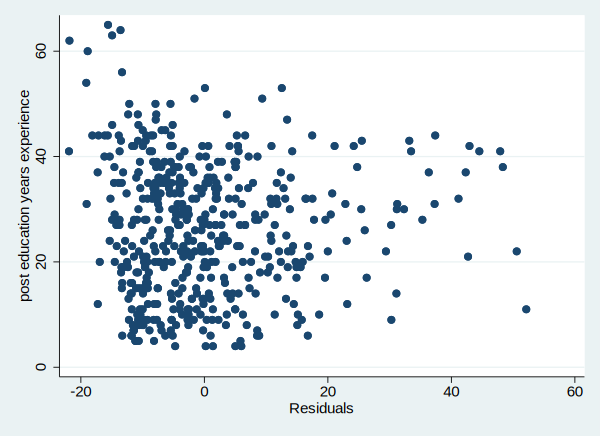

In [12]:
* females
regress wage exper if female==0
predict e_male, residuals
scatter exper e_male if female == 0



      Source |       SS           df       MS      Number of obs   =       112
-------------+----------------------------------   F(1, 110)       =      0.78
       Model |  119.699598         1  119.699598   Prob > F        =    0.3777
    Residual |  16781.0251       110  152.554773   R-squared       =    0.0071
-------------+----------------------------------   Adj R-squared   =   -0.0019
       Total |  16900.7247       111  152.258781   Root MSE        =    12.351

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |    .073835   .0833544     0.89   0.378    -.0913539    .2390238
       _cons |   15.78931   2.531881     6.24   0.000     10.77171     20.8069
------------------------------------------------------------------------------


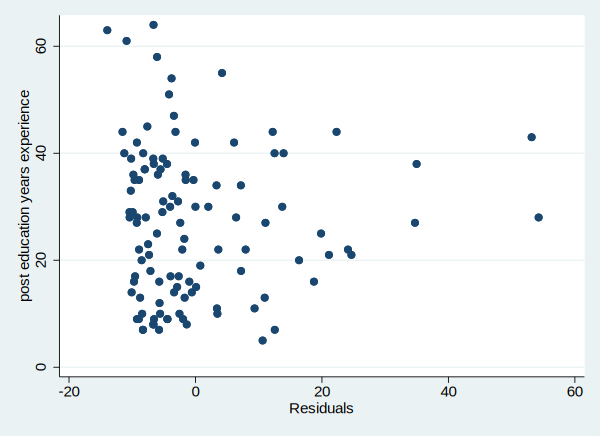

In [13]:
* black
regress wage exper if black==1
predict e_black, residuals
scatter exper e_black if black ==1



      Source |       SS           df       MS      Number of obs   =       440
-------------+----------------------------------   F(1, 438)       =      7.77
       Model |  1267.27869         1  1267.27869   Prob > F        =    0.0055
    Residual |  71395.1494       438  163.002624   R-squared       =    0.0174
-------------+----------------------------------   Adj R-squared   =    0.0152
       Total |   72662.428       439  165.518059   Root MSE        =    12.767

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .1358448   .0487197     2.79   0.006     .0400914    .2315982
       _cons |   19.09817   1.416441    13.48   0.000     16.31431    21.88204
------------------------------------------------------------------------------


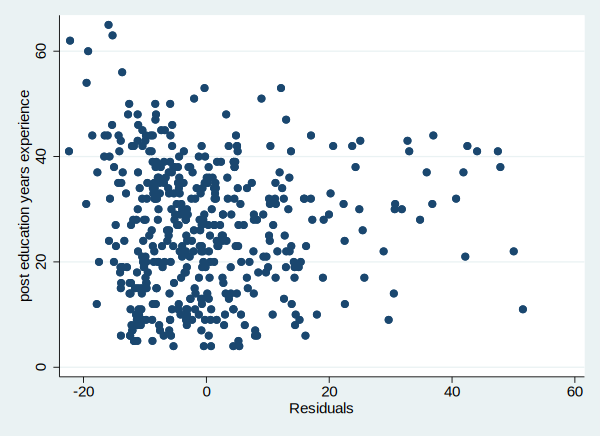

In [14]:
* white males
regress wage exper if female==0 & black == 0
predict e_white_male, residuals
scatter exper e_white_male if female==0 & black == 0

Here is an example code for plotting a distribution that shows two rejection regions:


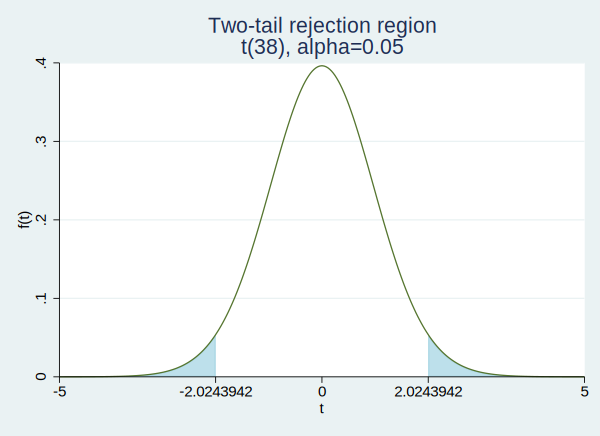

In [15]:
clear all
global t025=invttail(38,0.975)
global t975=invttail(38,0.025)
twoway (function y=tden(38,x), range(-5 $t025) ///
     color(ltblue) recast(area)) ///
   (function y=tden(38,x), range($t975 5) ///  
     color(ltblue) recast(area)) /// 
   (function y=tden(38,x), range(-5 5)), ///
   legend(off) plotregion(margin(zero)) /// 
     ytitle("f(t)") xtitle("t") /// 
   xlabel(-5 $t025 0 $t975 5) ///
   name(twotail, replace) /// 
        title("Two-tail rejection region" "t(38), alpha=0.05") 
